Labo 5 ISD - Alexandre Jaquier et Valentin Kaelin

# 1. Régression linéaire simple

**1)** Installez la bibliothèque sklearn

In [130]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from random import randrange, seed
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import model_selection

**2)** Créez un notebook pour lire la base de données «Boston housing dataset » et générez un dataframe.

In [2]:
boston_dataset = load_boston()
boston_frame = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
boston_frame['MEDV'] = boston_dataset.target

boston_frame.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**3)** Se familiariser avec la base de données (p.ex., nombre d’observations, des classes, d’attributs, statistiques des attributs, données manquantes).  
Générez un histogramme de la distribution de la variable indépendente.

In [3]:
print(boston_frame.count())
print("-----------------------------------")
print(boston_frame.dropna().count())
print("-----------------------------------")
print(boston_frame.isnull().sum())

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64
-----------------------------------
CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64
-----------------------------------
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [4]:
print(boston_frame.columns)
print(len(boston_frame.columns))

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
14


Text(0, 0.5, 'Numbers of owner-occupied homes')

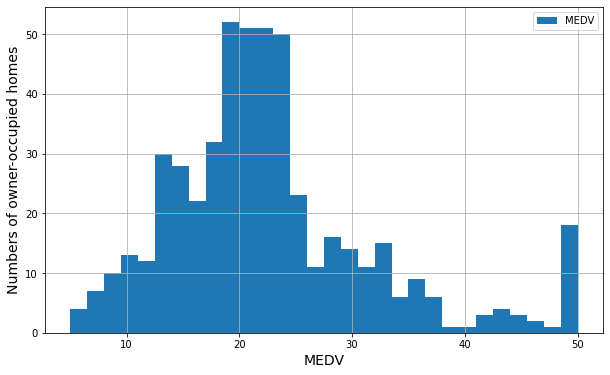

In [5]:
#print(boston_frame['MEDV'])
plot = pd.plotting.hist_series(boston_frame['MEDV'], legend=True, figsize=(10, 6), bins=30)
plot.set_title('', fontsize=15)
plot.set_xlabel('MEDV', fontsize=14)
plot.set_ylabel('Numbers of owner-occupied homes', fontsize=14)
#plot.set_yscale('log')

**4)** Visualiser des boxplots des variables MEDV, RM, LSTAT, RAD, DIS et AGE.  
Commentez vos observations.

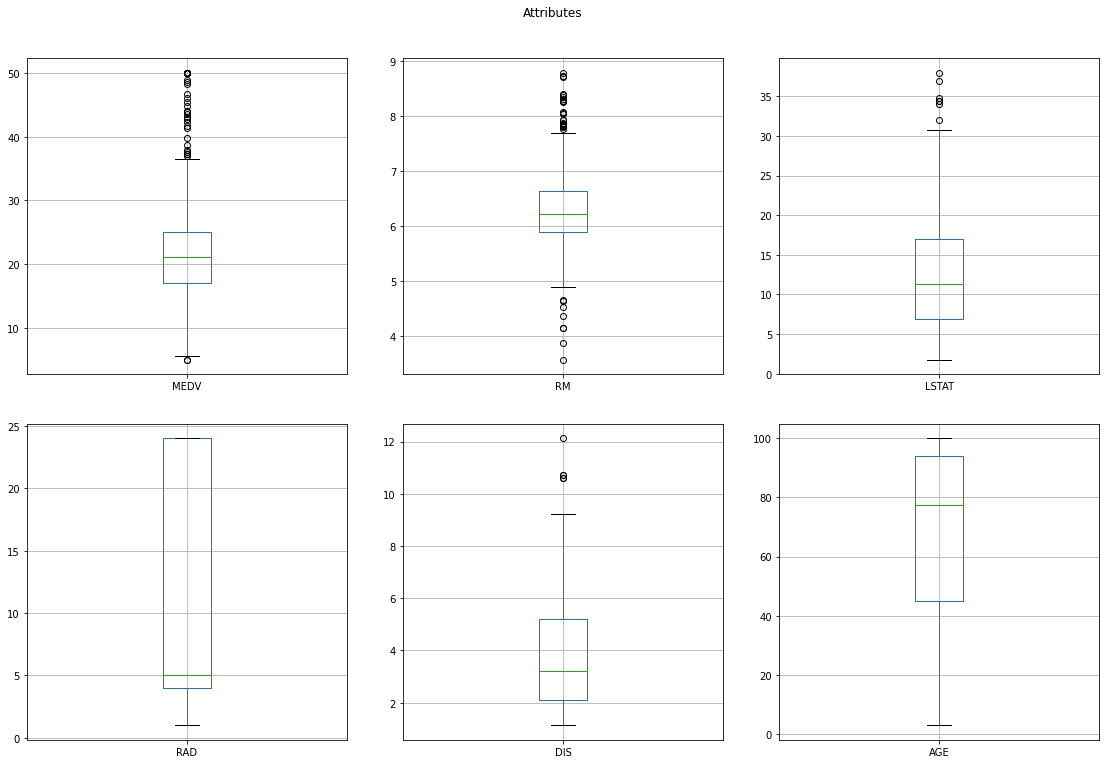

In [6]:
labels_to_show = ['MEDV', 'RM', 'LSTAT', 'RAD', 'DIS', 'AGE']
columns_to_show = boston_frame[labels_to_show].columns

fig, axes = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(16, 16))
for col in range(9):
    if(col < len(columns_to_show)):
        boston_frame.boxplot(columns_to_show[col], ax=axes[col // 3, col % 3])
    else:
        fig.delaxes(axes[col // 3, col % 3])
    
fig.suptitle('Attributes')
plt.tight_layout(pad=3)

On observe que certains attributs sont mieux répartis que d'autres. L'attribut RAD par exemple n'est pas très utile.  
Certains attributs comme MEDV ou RM possèdent de nombreux outliers.

**5)** Créez des modèles en utilisant l’algorithme de régression linéaire simple vue en cours pour estimer la valeur MEDV à partir des variables RM, RAD et LSTAT,
chaque fois utilisant seulement une des variables.  

Programmez les fonctions pour faire une validation hold-out (e.g., 80% train + 20% test x 100 fois) et pour calculer le coefficient de détermination afin d’évaluer
la performance moyenne du modèle.

Commentez vos résultats.

In [4]:
min_max = MinMaxScaler()
cols = boston_frame.columns.tolist()
scaled_df = min_max.fit_transform(boston_frame.values)
normalized_boston_df = pd.DataFrame(scaled_df,columns=cols)

In [3]:
seed(42)

def train_test_split(dataset, split=0.60):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

def compute_MSE(b, m, data):
    totalError = 0 # Mean squared error formula
    for i in range (0, len(data)):
        x = data[i, 0] # variable indépendante
        y = data[i, 1] # variable dépendante
        totalError += (y-(m*x + b)) ** 2 # somme des différences au carré
    return totalError/ float(len(data)) # on divise par N

def compute_pearson_coeff(predictions, ground_truth):
    sum_above = 0
    sum_below = 0
    mean = np.mean(predictions)
    
    for i in range(len(predictions)):
        sum_above += pow(ground_truth[i] - predictions[i], 2)
        sum_below += pow(ground_truth[i] - mean, 2)
    score = 1 - (sum_above / sum_below)
    return score

def step_gradient(b_current, m_current, data, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        b_gradient += -(1/N) * (y - (m_current * x + b_current))
        m_gradient += -(1/N) * x * (y - (m_current * x + b_current))

    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b,new_m]

def gradient_descent(data, starting_b, starting_m, learning_rate, num_epochs):
    b = starting_b
    m = starting_m
    for i in range(num_epochs):
        b, m = step_gradient(b, m, np.array(data), learning_rate)
        #print("After {0} epochs b = {1}, m = {2}, error = {3}".format(i, b, m, compute_MSE(b, m, data)))
    return [b, m]

def validation_hold_out(data, results_by_attributes, attr, n_splits, num_epochs, learning_rate):
    for i in range(n_splits):
        boston_train_validation, boston_test,  = train_test_split(data, 0.8)
        
        boston_test = pd.DataFrame(boston_test).to_numpy()
        boston_train_validation = pd.DataFrame(boston_train_validation).to_numpy()

        #Step 3: On initialise la valeur de m et de b
        initial_b = np.random.rand(1) # intercept
        initial_m = np.random.rand(1) # pente
        
        #Step 4: On applique la méthode du gradient descendant
        #print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_MSE(initial_b, initial_m, data)))
        [b, m] = gradient_descent(data, initial_b, initial_m, learning_rate, num_epochs)
        
        predictions = []
        for x in boston_test[:, 0]:
            predictions.append(m * x + b)
        
        ground_truth = boston_test[:, 1]
        
        results_by_attributes[attr]['b'].append(b)
        results_by_attributes[attr]['m'].append(m)
        results_by_attributes[attr]['e'].append(compute_MSE(b, m, data))
        results_by_attributes[attr]['r'].append(compute_pearson_coeff(predictions, ground_truth))
        #print("After {0} epochs b = {1}, m = {2}, error = {3}, r2 = {4}".format(num_epochs, b, m, compute_MSE(b, m, data), compute_pearson_coeff(predictions, ground_truth)))

In [9]:
linear_regression_attributes = ['RM', 'RAD', 'LSTAT']
n_splits = 100

results_by_attributes = {}
for attr in linear_regression_attributes:
    results_by_attributes[attr] = {'b': [], 'm': [], 'e': [], 'r': []}
    
print(results_by_attributes)

#Step 2: On choisit les hyperparamètres
# TODO: trouver des params moins éclatax
hyper_params_by_attributes = {
    'RM': {
        'num_epochs': 50,
        'learning_rate': 1,
    },
    'RAD': {
        'num_epochs': 100,
        'learning_rate': 1,
    },
    'LSTAT': {
        'num_epochs': 100,
        'learning_rate': 1,
    }
}

num_epochs = 50
learning_rate = 0.0001

print(hyper_params_by_attributes)

for attr in linear_regression_attributes:
    print(attr)
    #num_epochs = hyper_params_by_attributes[attr]['num_epochs']
    #learning_rate = hyper_params_by_attributes[attr]['learning_rate']

    #data = np.array([[i[boston_frame.columns.get_loc(attr)], i[index_medv]] for i in boston_frame.values.tolist()])
    data = normalized_boston_df[[attr, 'MEDV']].to_numpy()
    
    validation_hold_out(data, results_by_attributes, attr, n_splits, num_epochs, learning_rate)

print('FINITO')

{'RM': {'b': [], 'm': [], 'e': [], 'r': []}, 'RAD': {'b': [], 'm': [], 'e': [], 'r': []}, 'LSTAT': {'b': [], 'm': [], 'e': [], 'r': []}}
{'RM': {'num_epochs': 50, 'learning_rate': 1}, 'RAD': {'num_epochs': 100, 'learning_rate': 1}, 'LSTAT': {'num_epochs': 100, 'learning_rate': 1}}
RM
After 50 epochs b = [0.65443738], m = [0.9099071], error = [0.56902966], r2 = [0.05107294]
After 50 epochs b = [0.44133571], m = [0.90906073], error = [0.2987309], r2 = [0.07058592]
After 50 epochs b = [0.58918726], m = [0.21373561], error = [0.13114269], r2 = [0.06298237]
After 50 epochs b = [0.27748645], m = [0.70299999], error = [0.08867428], r2 = [0.17930687]
After 50 epochs b = [0.12938204], m = [0.7251978], error = [0.03748282], r2 = [0.38785845]
After 50 epochs b = [0.94766187], m = [0.88789972], error = [1.06532115], r2 = [0.01925312]
After 50 epochs b = [0.97516104], m = [0.18377796], error = [0.49965677], r2 = [0.01644336]
After 50 epochs b = [0.44440409], m = [0.94840758], error = [0.32394298], 

After 50 epochs b = [0.17434338], m = [0.44603459], error = [0.02855938], r2 = [0.35310042]
After 50 epochs b = [0.88313749], m = [0.80014358], error = [0.85279642], r2 = [0.025605]
After 50 epochs b = [0.97699007], m = [0.89268007], error = [1.13131383], r2 = [0.0214173]
After 50 epochs b = [0.70833714], m = [0.00622743], error = [0.14511566], r2 = [0.00197009]
After 50 epochs b = [0.96301784], m = [0.20657428], error = [0.49861124], r2 = [0.01730519]
RAD
After 50 epochs b = [0.42069483], m = [0.26262413], error = [0.08359601], r2 = [-0.45471079]
After 50 epochs b = [0.03666855], m = [0.36312167], error = [0.12946297], r2 = [-0.86822223]
After 50 epochs b = [0.94610109], m = [0.72933386], error = [0.84565915], r2 = [-0.16281884]
After 50 epochs b = [0.73488914], m = [0.18248059], error = [0.22785988], r2 = [-0.06252427]
After 50 epochs b = [0.19297846], m = [0.34571019], error = [0.08380184], r2 = [-0.71118009]
After 50 epochs b = [0.87117725], m = [0.97495989], error = [0.94739175], 

After 50 epochs b = [0.38193269], m = [0.3731304], error = [0.10075926], r2 = [-0.59979862]
After 50 epochs b = [0.14784216], m = [0.75869377], error = [0.17035887], r2 = [-3.11697987]
After 50 epochs b = [0.09820981], m = [0.59103103], error = [0.13163155], r2 = [-2.21760012]
After 50 epochs b = [0.9545554], m = [0.98224791], error = [1.10258178], r2 = [-0.20864345]
After 50 epochs b = [0.04413836], m = [0.57845428], error = [0.14066347], r2 = [-1.47784729]
After 50 epochs b = [0.09742241], m = [0.88150149], error = [0.20604756], r2 = [-3.80351601]
After 50 epochs b = [0.24633169], m = [0.36225326], error = [0.08188432], r2 = [-1.00195787]
After 50 epochs b = [0.50490124], m = [0.98055652], error = [0.46718878], r2 = [-0.63998353]
After 50 epochs b = [0.00146727], m = [0.83882144], error = [0.19760089], r2 = [-2.47510158]
After 50 epochs b = [0.2705835], m = [0.00960504], error = [0.05559993], r2 = [-0.00875433]
After 50 epochs b = [0.23261531], m = [0.04248668], error = [0.06439117],

After 50 epochs b = [0.34727536], m = [0.30746237], error = [0.06611701], r2 = [-0.51866818]
After 50 epochs b = [0.87166763], m = [0.34522399], error = [0.41029538], r2 = [-0.05353971]
After 50 epochs b = [0.95724294], m = [0.58601857], error = [0.643664], r2 = [-0.076059]
After 50 epochs b = [0.23470107], m = [0.36186803], error = [0.07032318], r2 = [-0.56458556]
After 50 epochs b = [0.6452307], m = [0.75965582], error = [0.34391529], r2 = [-0.26817677]
After 50 epochs b = [0.13365179], m = [0.96384844], error = [0.13603707], r2 = [-2.547391]
After 50 epochs b = [0.26125871], m = [0.78102763], error = [0.12310051], r2 = [-1.30269483]
After 50 epochs b = [0.01908661], m = [0.5702683], error = [0.12756759], r2 = [-0.62975021]
After 50 epochs b = [0.98484868], m = [0.41137485], error = [0.58992191], r2 = [-0.05401123]
After 50 epochs b = [0.67111462], m = [0.73534794], error = [0.359395], r2 = [-0.27343241]
After 50 epochs b = [0.86995457], m = [0.48333367], error = [0.4713006], r2 = [-

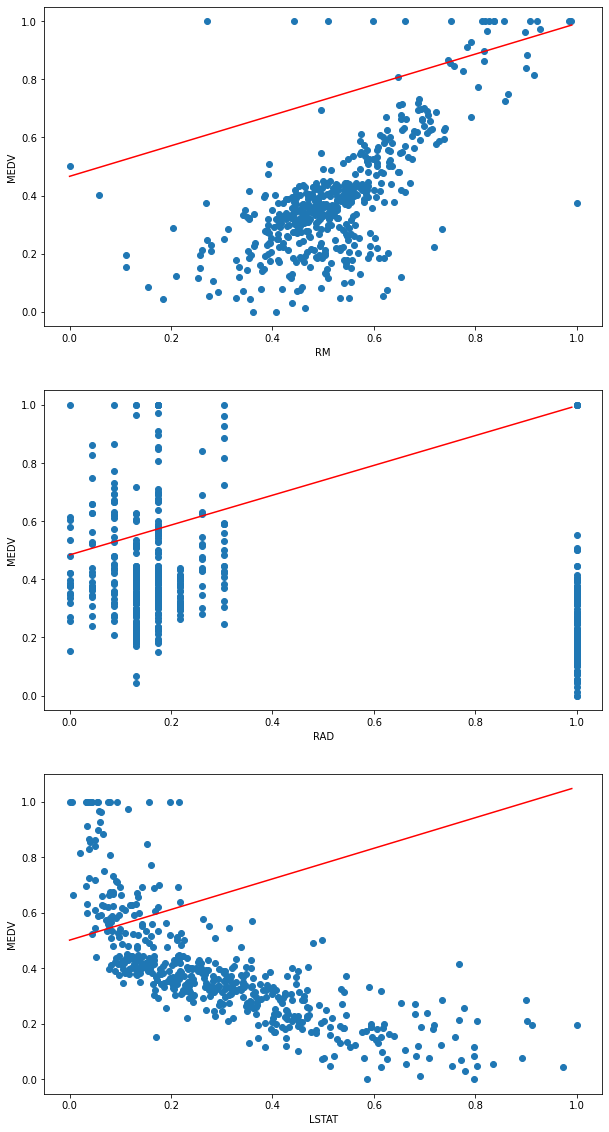

In [10]:
fig, ax = plt.subplots(len(linear_regression_attributes), figsize=(10, 20))


for i in range(len(linear_regression_attributes)):
    attr = linear_regression_attributes[i]
    
    #print(results_by_attributes[attr]['b'])
    #print(results_by_attributes[attr]['m'])
    #print('----')
    
    mean_b = np.mean(results_by_attributes[attr]['b'])
    mean_m = np.mean(results_by_attributes[attr]['m'])
    mean_e = np.mean(results_by_attributes[attr]['e'])
    
    x_data = normalized_boston_df[attr]
    ax[i].scatter(x_data, normalized_boston_df['MEDV'])
    #x = np.arange(x_data.min(), x_data.max(), 0.5)
    x = np.arange(0, 1, 0.01)
    ax[i].plot(x, mean_m*x + mean_b, 'r')
    ax[i].set_xlabel(attr)
    ax[i].set_ylabel('MEDV')
    #ax[i].set_ylim([-100, 100])


In [11]:
mean_r = [np.mean(results_by_attributes[attr]['r']) for attr in linear_regression_attributes]

best_attr = max(mean_r)
index_best_attr = mean_r.index(best_attr)

print(*mean_r, sep="\n")
print('Avec les hyper paramètres de base:')
print(f'\nMeilleur attribut selon la moyenne du coefficient de détermination linéaire de Pearson (R2): {linear_regression_attributes[index_best_attr]}: {best_attr}')

0.10916584922975513
-0.8365132032683817
-0.49152735530124836
Avec les hyper paramètres de base:

Meilleur attribut selon la moyenne du coefficient de détermination linéaire de Pearson (R2): RM: 0.10916584922975513


TODO: changer cette phrase, dire que c'est nul, RM c'est le moins pire.

On utilisera donc l'attribut **LSTAT** en combinaison de **MEDV** pour la suite des manipulations car il a les meilleurs résultats.

**6)** Explorez les hyper-paramètres : learning_rate et nombre d’epochs d’entraînement.
Calculez la performance moyenne (c.a.d., la moyenne de x100 fois le coefficient de détermination calculé sur le test set) du meilleur modèle trouvé par validation hold-out.
Indiquez la valeur des hyper-paramètres qui donnent les meilleurs résultats et la meilleure performance trouvée. 

Générez un scatter-plot affichant les données (variable indépendante, variable dépendante) et la ligne droite trouvée par régression linéaire.
(Note: la variable dépendante est MEDV).

In [7]:
linear_regression_attributes = ['RM', 'RAD', 'LSTAT']
n_splits = 100

results_by_learning_rate = []
results_by_attributes = {}
for attr in linear_regression_attributes:
    results_by_attributes[attr] = {'b': [], 'm': [], 'e': [], 'r': []}

num_epochs = 100
learning_rates = [0.0001, 0.1, 0.5, 1]

for i in range(len(learning_rates)):
    for attr in linear_regression_attributes:
        print(f'LEARNING RATE: {learning_rates[i]} - {attr}')
        
        
        results_by_learning_rate.append(results_by_attributes)

        #learning_rate = hyper_params_by_attributes[attr]['learning_rate']

        data = normalized_boston_df[[attr, 'MEDV']].to_numpy()
        validation_hold_out(data, results_by_learning_rate[i], attr, n_splits, num_epochs, learning_rates[i])
        print(f'Mean R2: {np.mean(results_by_learning_rate[i][attr]["r"])}\n')

print('TERMINE')

LEARNING RATE: 0.0001 - RM
Mean R2: 0.1083463255544304

LEARNING RATE: 0.0001 - RAD
Mean R2: -0.4963197608344083

LEARNING RATE: 0.0001 - LSTAT
Mean R2: -0.3567260341248467

LEARNING RATE: 0.1 - RM
Mean R2: 0.2062401899485829

LEARNING RATE: 0.1 - RAD
Mean R2: -0.2372329280182587

LEARNING RATE: 0.1 - LSTAT
Mean R2: -0.2397875443533604

LEARNING RATE: 0.5 - RM
Mean R2: 0.2803730644969567

LEARNING RATE: 0.5 - RAD
Mean R2: -0.10973292701710577

LEARNING RATE: 0.5 - LSTAT
Mean R2: 0.00785695476253764

LEARNING RATE: 1 - RM
Mean R2: 0.32958229437646347

LEARNING RATE: 1 - RAD
Mean R2: -0.04550298442566927

LEARNING RATE: 1 - LSTAT
Mean R2: 0.1411506121648477

TERMINE


In [16]:
for i in range(len(learning_rates)):
    print(f'------------------------------------- LEARNING RATE: {learning_rates[i]}')
    
    for attr in results_by_learning_rate[i]:
        print(f'Attribute {attr}')
        print(f'Mean B: {np.mean(results_by_learning_rate[i][attr]["b"])}')
        print(f'Mean M: {np.mean(results_by_learning_rate[i][attr]["m"])}')
        print(f'Mean E: {np.mean(results_by_learning_rate[i][attr]["e"])}')
        print(f'Mean R2: {np.mean(results_by_learning_rate[i][attr]["r"])}\n')

------------------------------------- LEARNING RATE: 0.0001
Attribute RM
Mean B: 0.14647508348547678
Mean M: 0.6482307876483526
Mean E: 0.08859742871537465
Mean R2: 0.32958229437646347

Attribute RAD
Mean B: 0.4637054405297361
Mean M: -0.004527602602203036
Mean E: 0.09889314599944968
Mean R2: -0.04550298442566927

Attribute LSTAT
Mean B: 0.5109960968680629
Mean M: -0.18873945065200168
Mean E: 0.08181726523016214
Mean R2: 0.1411506121648477

------------------------------------- LEARNING RATE: 0.1
Attribute RM
Mean B: 0.14647508348547678
Mean M: 0.6482307876483526
Mean E: 0.08859742871537465
Mean R2: 0.32958229437646347

Attribute RAD
Mean B: 0.4637054405297361
Mean M: -0.004527602602203036
Mean E: 0.09889314599944968
Mean R2: -0.04550298442566927

Attribute LSTAT
Mean B: 0.5109960968680629
Mean M: -0.18873945065200168
Mean E: 0.08181726523016214
Mean R2: 0.1411506121648477

------------------------------------- LEARNING RATE: 0.5
Attribute RM
Mean B: 0.14647508348547678
Mean M: 0.64823

# 2. Régression linéaire multiple


**1)** Utilisez la bibliothèque sklearn pour entraîner un modèle de régression linéaire multiple qui exploite plusieurs variables indépendantes (p.ex. RM et LSTAT) de la base de données « Boston Housing dataset ».

In [161]:
attributes = ['RM', 'LSTAT']

x1 = boston_frame[attributes].values 
y1 = boston_frame['MEDV'].values

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x1, y1, test_size=0.20, random_state=3)

linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)
y_pred = linear_regression.predict(X_test)

print(f'R2 score: {r2_score(Y_test, y_pred)}')

R2 score: 0.7090716783736138


**2)** Utilisez la bibliothèque sklearn pour préparer les données pour faire une validation hold-out ainsi que pour le calcul du coefficient de détermination (r2_score) des modèles.

In [184]:
x1 = boston_frame[attributes].values 
y1 = boston_frame['MEDV'].values

n_splits = 100
r2_scores = np.array([])

for i in range(n_splits):
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x1, y1, test_size=0.20)

    linear_regression = LinearRegression()
    linear_regression.fit(X_train, Y_train)
    y_pred = linear_regression.predict(X_test)

    r2_scores = np.append(r2_scores, r2_score(Y_test, y_pred))
    
print(np.mean(r2_scores))

0.6354705682164656


**3)** Présentez les résultats de vos expériences (points 1 et 2) avec la base de données proposée et commentez ceux-ci.

**4)** Générez un scatter-plot (valeur prédite, variable dépendante) et une ligne droite correspondant à l’équation valeur prédite = valeur dépendante (Note : la variable dépendante est MEDV).